In [44]:
# Feature Matching - Força Bruta
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
# imprime a imagem
def showImage(image):
    # definindo o tamanho da imagem
    img = plt.figure(figsize=(15,14))

    ax = img.add_subplot(111)
    ax.imshow(image, cmap='gray')

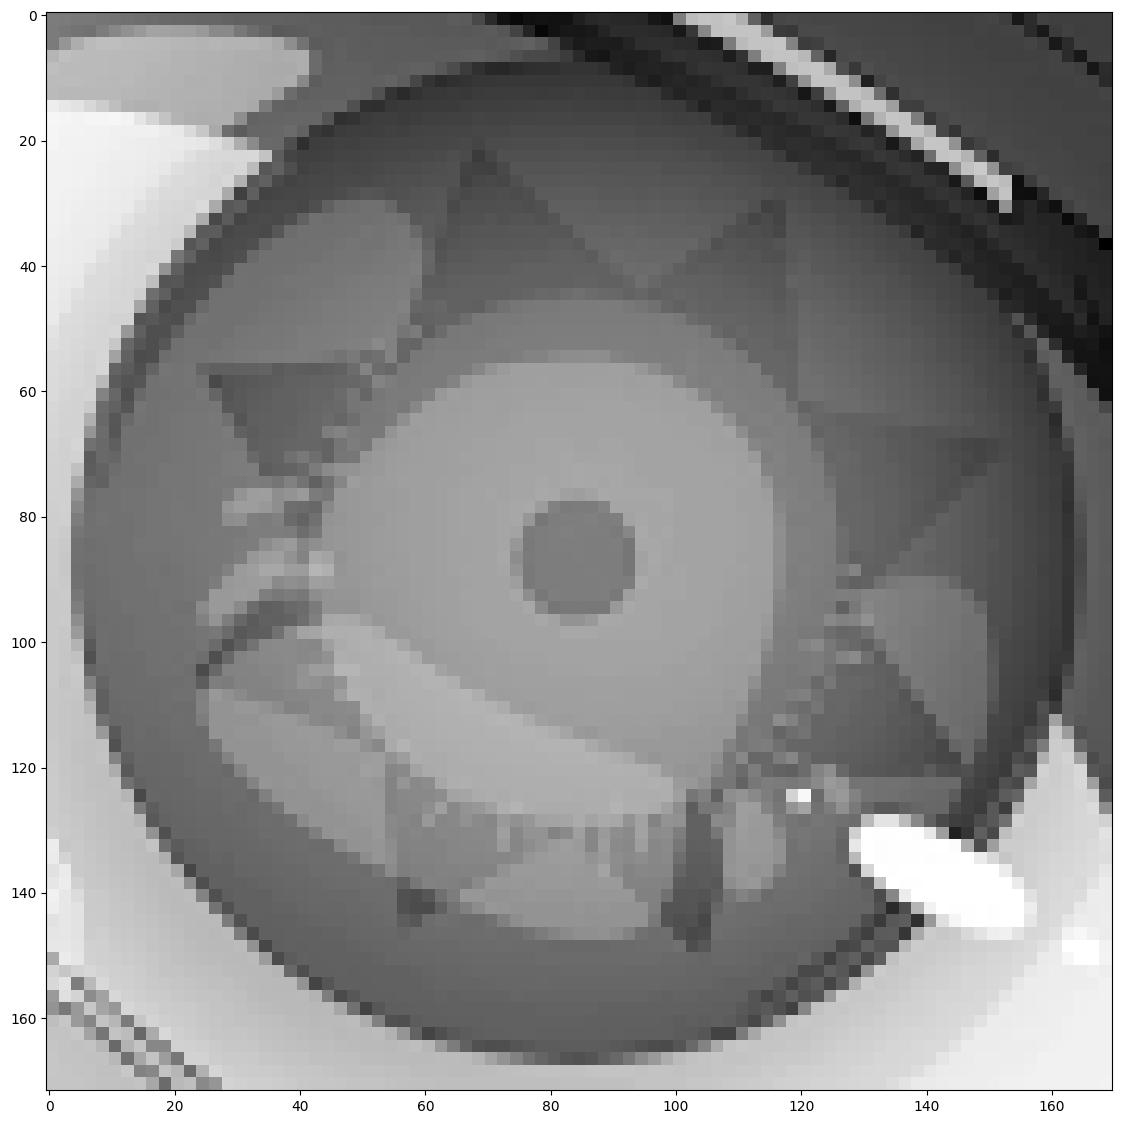

In [46]:
# carregando a imagem do sharingan
sharinganImage = cv2.imread('../../assets/sharingan.png')
sharinganImage = cv2.cvtColor(sharinganImage, cv2.COLOR_BGR2GRAY)
showImage(sharinganImage)

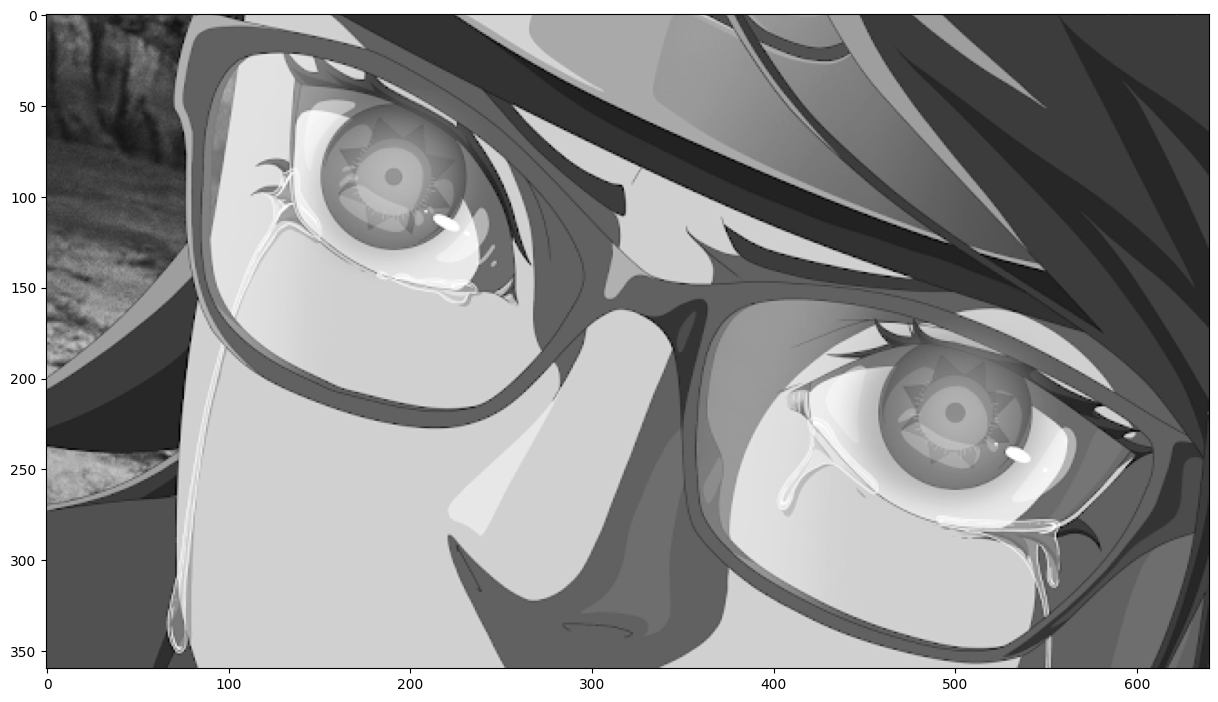

In [47]:
# carregando a imagem da sarada
saradaImage = cv2.imread('../../assets/sharingan-active.png')
saradaImage = cv2.cvtColor(saradaImage, cv2.COLOR_BGR2GRAY)
showImage(saradaImage)

Detecção de força bruta

In [48]:
# Objeto de detecção
orb = cv2.ORB_create()

In [49]:
# retorna os pontos chaves destinos
kp1, des1 = orb.detectAndCompute(sharinganImage, None) # none -> sem máscara
kp2, des2 = orb.detectAndCompute(saradaImage, None)

In [50]:
# cria o modelo
bruteForce = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [51]:
# verificando a semelhança entre destinos
matches = bruteForce.match(des1, des2)

In [52]:
# organizando os dados na ordem de distância
matches = sorted(matches, key=lambda x:x.distance)

In [53]:
# verifica se tem matche
sharinganMatches = cv2.drawMatches(sharinganImage, kp1, saradaImage, kp2, matches[:16], None, flags=2)

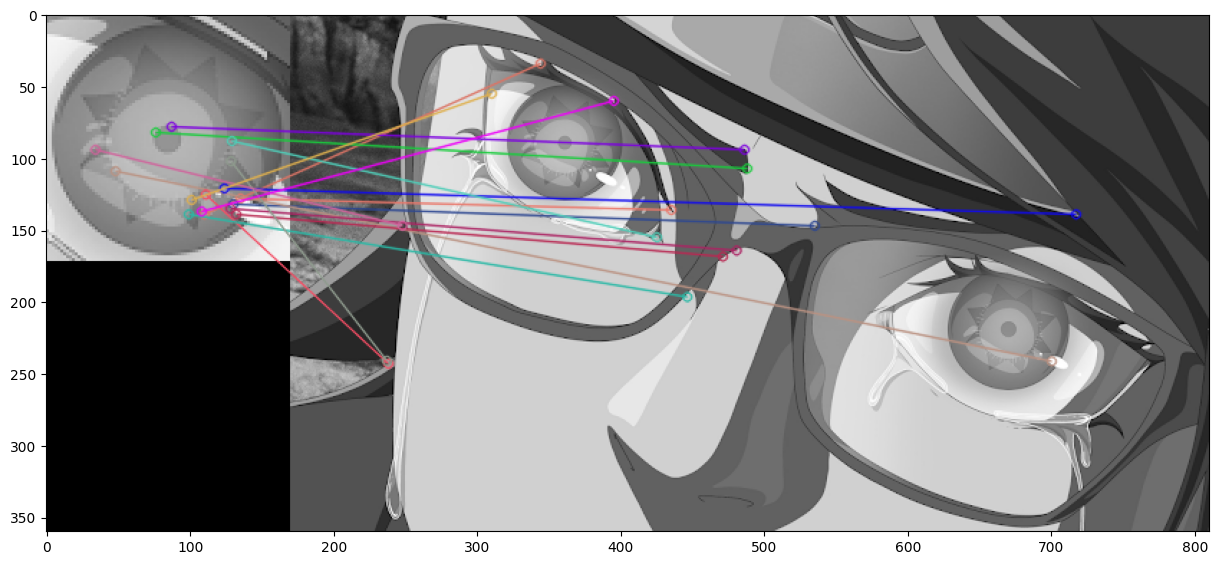

In [54]:
showImage(sharinganMatches)